<a href="https://colab.research.google.com/github/vhpraneeth/VIT_DWDM/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

18BCE7147

[GitHub Link](https://github.com/vhpraneeth/VIT_DWDM/blob/main/Project.ipynb)


#Topic: Stock market prediction

##Import the libraries

In [1]:
import math
import pandas_datareader as web  # for loading stock market data
import numpy as np
import pandas as pd

##Get the stock quote

In [22]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17') 
df.head()  # Show the data 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.566676
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.634213
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.774481
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.908023
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.887549


Data has 2003 rows and 7 columns

In [14]:
df.shape

(2003, 7)

Drop Adj Close column and make Date as a column instead of index

In [23]:
df.drop('Adj Close',axis = 1, inplace = True)
df['Date'] = pd.to_datetime(df.index)
df.reset_index(drop=True, inplace=True)
df.head()

,High,Low,Open,Close,Volume,Date
0,14.732142,14.607142,14.621428,14.686786,302220800.0,2012-01-03
1,14.810000,14.617143,14.642858,14.765715,260022000.0,2012-01-04
2,14.948215,14.738214,14.819643,14.929643,271269600.0,2012-01-05
3,15.098214,14.972143,14.991786,15.085714,318292800.0,2012-01-06
4,15.276786,15.048214,15.196428,15.061786,394024400.0,2012-01-09


##Visualize the data

In [ ]:
import plotly.express as px

Plotting the close price history

In [61]:
px.line(df, x='Date',y='Close', title='Close Price History')

Plotting High vs Low

In [59]:
px.scatter(df, x='High',y='Low', title='High vs Low')

Plotting Open vs Close

In [62]:
px.scatter(df, x='Open',y='Close', title='Open vs Close')

##Checking data

In [25]:
df.isnull().sum()

High      0
Low       0
Open      0
Close     0
Volume    0
Date      0
dtype: int64

In [26]:
df.isna().any()

High      False
Low       False
Open      False
Close     False
Volume    False
Date      False
dtype: bool

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   High    2003 non-null   float64       
 1   Low     2003 non-null   float64       
 2   Open    2003 non-null   float64       
 3   Close   2003 non-null   float64       
 4   Volume  2003 non-null   float64       
 5   Date    2003 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 94.0 KB


In [28]:
df.describe()

,High,Low,Open,Close,Volume
count,2003.000000,2003.000000,2003.000000,2003.000000,2.003000e+03
mean,31.798525,31.238634,31.519792,31.527449,2.384275e+08
std,12.507078,12.308627,12.398193,12.419818,1.875556e+08
min,14.271428,13.753572,13.856071,13.947500,4.544800e+07
25%,21.662499,21.228750,21.441607,21.492857,1.104316e+08
50%,28.504999,27.915001,28.205000,28.230000,1.747996e+08
75%,41.484999,40.531250,40.961250,40.992500,2.992836e+08
max,70.442497,69.699997,69.892502,70.102501,1.506120e+09


## Preparing data for training

In [31]:
X = df[['Open','High','Low','Volume']]
y = df['Close']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Rows in training data

In [35]:
X_train.shape

(1502, 4)

Rows in testing data

In [34]:
X_test.shape

(501, 4)

In [65]:
X_test.head()

,Open,High,Low,Volume
1442,37.945000,38.480000,37.922501,146640000.0
294,15.160714,15.428928,15.037857,468473600.0
712,27.002501,27.010000,26.802500,178557200.0
252,19.177500,19.236786,18.779642,594333600.0
820,31.462500,31.645000,31.165001,129936000.0


In [66]:
y_test.head()

1442    38.285000
294     15.377857
712     27.000000
252     18.821428
820     31.639999
Name: Close, dtype: float64

## Training the model

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [78]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
predicted = regressor.predict(X_test)

## Comparing predicted and actual

In [105]:
df_compare = pd.DataFrame({'Actual':y_test, 'Predicted':predicted})
df_compare.join(df['Date'])
df_compare.head()

,Actual,Predicted
1442,38.285000,38.357094
294,15.377857,15.273878
712,27.000000,26.853773
252,18.821428,18.915781
820,31.639999,31.381087


In [49]:
df_compare.shape

(501, 2)

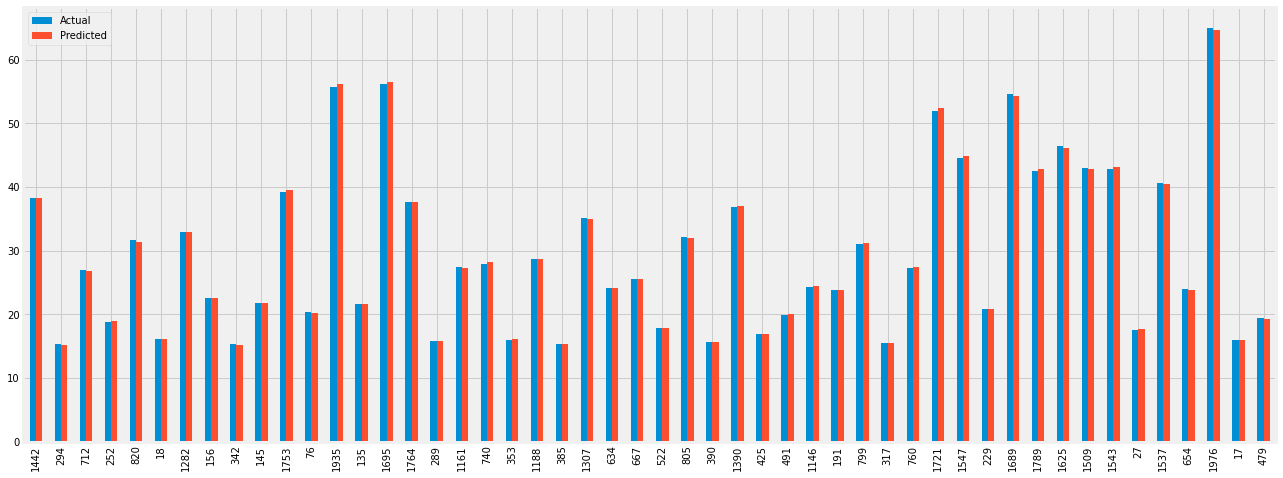

In [69]:
graph_df = df_compare.head(50)
graph_df.plot(kind='bar', figsize=(20,8))

## Score of the regressor

In [41]:
regressor.score(X_test, y_test)

0.9998098593556778

Predicting using custom values

In [90]:
X_test_2 = pd.DataFrame({'Open': 37, 'High': 38, 'Low': 37, 'Volume': 146640000.0}, index=[0])
regressor.predict(X_test_2)

,Open,High,Low,Volume
0,37,38,37,146640000.0


## Predicting Close price by Date

In [98]:
X = df[['Open', 'Date']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [100]:
X_test.head()

,Open,Date
1442,37.945000,2017-09-26
294,15.160714,2013-03-07
712,27.002501,2014-10-31
252,19.177500,2013-01-04
820,31.462500,2015-04-09


In [101]:
y_test.head()

1442    38.285000
294     15.377857
712     27.000000
252     18.821428
820     31.639999
Name: Close, dtype: float64

In [104]:
df['Date'].dtype

dtype('<M8[ns]')

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

# Project 2: Predicting unemployment by stock market prices

In [ ]:
# Pending